In [1]:
from qiskit import *

In [4]:
qc = QuantumCircuit(3, 3)
qc.cswap(0, 1, 2)
qc.decompose().draw()

q_0: ───────■───────
     ┌───┐  │  ┌───┐
q_1: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_2: ──■──┤ X ├──■──
          └───┘     
c: 3/═══════════════

In [2]:
mygate = QuantumCircuit(3)
mygate.cnot(0, 2)
mygate.cnot(0, 1)
mygate.decompose().draw()

q_0: ──■────■──
       │  ┌─┴─┐
q_1: ──┼──┤ X ├
     ┌─┴─┐└───┘
q_2: ┤ X ├─────
     └───┘

In [3]:
f2g_gate = mygate.to_gate()
new_gate = QuantumCircuit(5)
new_gate.append(f2g_gate, [1, 2, 3])
new_gate.decompose().draw()

q_0: ──────────
               
q_1: ──■────■──
       │  ┌─┴─┐
q_2: ──┼──┤ X ├
     ┌─┴─┐└───┘
q_3: ┤ X ├─────
     └───┘     
q_4: ──────────

In [4]:
def doubleFeyman(inp1, inp2, inp3):
    qc_new = QuantumCircuit(5, 3)
    
    #conditions
    if(inp1 == '1'):
        qc_new.x(1)
    if(inp2 == '1'):
        qc_new.x(2)
    if(inp3 == '1'):
        qc_new.x(3)
    qc_new.barrier()
    
    #import the gate
    qc_new.append(f2g_gate, [1, 2, 3])
    qc_new.measure(1, 0)
    qc_new.measure(2, 1)
    qc_new.measure(3, 2)
    qc_new.decompose().draw()
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc_new, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc_new, output

i1 i2 i3  PQR
0  0  0 = 000
0  0  1 = 100
0  1  0 = 010
0  1  1 = 110
1  0  0 = 111
1  0  1 = 011
1  1  0 = 101
1  1  1 = 001
____________________________
To draw the quantum circuit for the feynman gate in block circuit


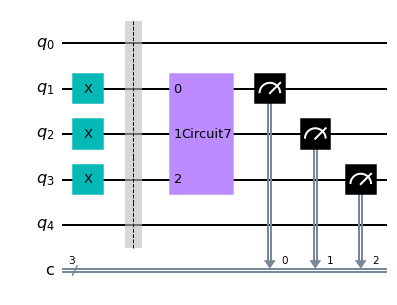

____________________________
To draw the quantum circuit for the feynman gate in gate form


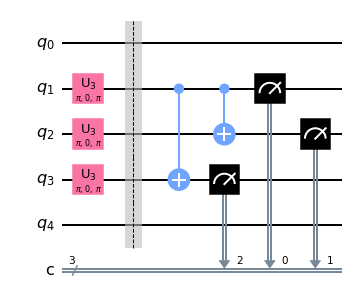

In [8]:
print('{} {} {}'.format('i1', 'i2', 'i3'), ' PQR' )
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        for inp3 in ['0', '1']:
            qc_new, output = doubleFeyman(inp1, inp2, inp3)
            print('{}  {}  {}'.format(inp1, inp2, inp3), '=', output)

print('____________________________')
print('To draw the quantum circuit for the feynman gate in block circuit')
display(qc_new.draw('mpl'))
print('____________________________')
print('To draw the quantum circuit for the feynman gate in gate form')
display(qc_new.decompose().draw('mpl'))

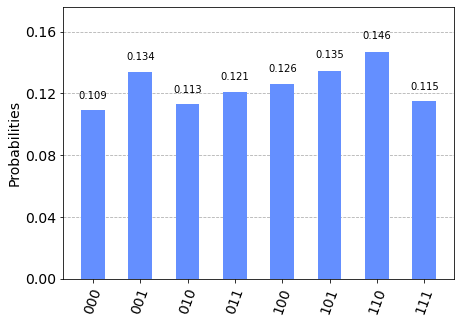

In [15]:
from qiskit.visualization import plot_histogram
#histogram plot of the f2g gate

mygate = QuantumCircuit(3,3)
for i in range(3):
    mygate.h(i)
mygate.cnot(0, 2)
mygate.cnot(0, 1)

mygate.measure(0, 0)
mygate.measure(1, 1)
mygate.measure(2, 2)

job = execute(mygate, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count)